In [45]:
from dotenv import load_dotenv
from datetime import datetime
import os
import requests
import pandas as pd
import seaborn as sns
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation


In [46]:
load_dotenv()
api_key=os.getenv("ALPACA_API_KEY")
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [47]:
tickers = ["TSLA","KO","RBLX"]
timeframe="1DAY"

In [48]:
api = REST(api_key , api_secret_key, api_version='v2')
yearly = api.get_bars(tickers, TimeFrame.Day, "2020-03-01", "2022-03-01", adjustment='raw').df

In [49]:
yearly

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-03-02 05:00:00+00:00,53.90,55.9600,53.7000,55.92,25698629,158600,54.999164,KO
2020-03-03 05:00:00+00:00,56.78,57.4900,55.6400,56.06,27099173,186893,56.353393,KO
2020-03-04 05:00:00+00:00,56.41,59.0000,56.4100,58.92,20526142,111121,58.215396,KO
2020-03-05 05:00:00+00:00,57.74,58.1700,56.1900,56.74,17948494,127407,57.054751,KO
2020-03-06 05:00:00+00:00,54.71,55.9100,53.9800,55.26,22353968,157331,55.003228,KO
...,...,...,...,...,...,...,...,...
2022-02-23 05:00:00+00:00,830.43,835.2997,760.5600,764.04,31448251,1227396,789.202418,TSLA
2022-02-24 05:00:00+00:00,700.39,802.4800,700.0000,800.77,44600581,1291607,755.168642,TSLA
2022-02-25 05:00:00+00:00,809.66,819.5000,782.4005,809.87,24620202,726859,802.144572,TSLA


In [50]:
yearly.index=yearly.index.date
yearly=yearly[['close', 'symbol']]
table = pd.pivot_table(yearly, values='close', index=[yearly.index, columns=['symbol'])
table

symbol,KO,RBLX,TSLA
2020-03-02,55.92,NaN,743.62
2020-03-03,56.06,NaN,745.51
2020-03-04,58.92,NaN,749.50
2020-03-05,56.74,NaN,724.54
2020-03-06,55.26,NaN,703.48
...,...,...,...
2022-02-23,61.59,45.68,764.04
2022-02-24,60.51,50.10,800.77
2022-02-25,62.85,50.05,809.87
2022-02-28,62.24,51.57,870.43


In [51]:
df_making_money = table.pct_change()
df_making_money.dropna(inplace=True)
df_making_money['KO']

2021-03-11   -0.010886
2021-03-12   -0.010220
2021-03-15    0.013304
2021-03-16    0.003723
2021-03-17    0.000390
                ...   
2022-02-23   -0.011079
2022-02-24   -0.017535
2022-02-25    0.038671
2022-02-28   -0.009706
2022-03-01   -0.004338
Name: KO, Length: 246, dtype: float64

<AxesSubplot:ylabel='Frequency'>

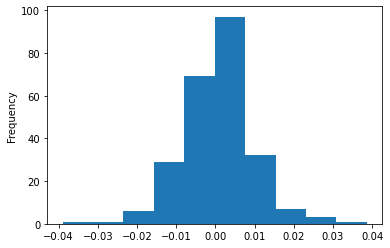

In [52]:
df_making_money['KO'].plot.hist()

<AxesSubplot:ylabel='Density'>

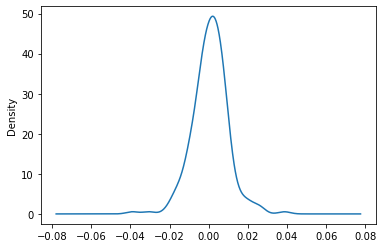

In [53]:
df_making_money['KO'].plot.density()

<AxesSubplot:ylabel='Density'>

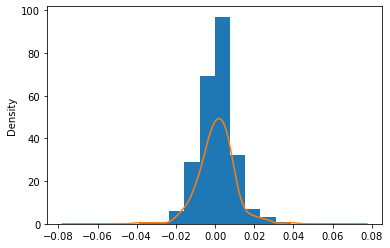

In [54]:
df_making_money['KO'].plot.hist()
df_making_money['KO'].plot.density()

/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KO', ylabel='Density'>

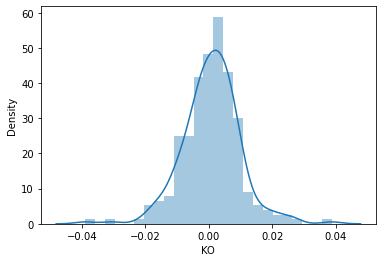

In [55]:
sns.distplot(df_making_money['KO'])

/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/satishsurath/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KO', ylabel='Density'>

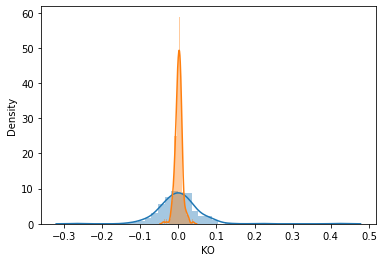

In [56]:
sns.distplot(df_making_money['RBLX'])
sns.distplot(df_making_money['KO'])

In [63]:
#Create an object for Monte Carlo Simulation
table2 = pd.pivot_table(yearly, values='close', index=[yearly.index,'symbol'], columns=['symbol'])
table2

symbol                KO   RBLX    TSLA
           symbol                      
2020-03-02 KO      55.92    NaN     NaN
           TSLA      NaN    NaN  743.62
2020-03-03 KO      56.06    NaN     NaN
           TSLA      NaN    NaN  745.51
2020-03-04 KO      58.92    NaN     NaN
...                  ...    ...     ...
2022-02-28 RBLX      NaN  51.57     NaN
           TSLA      NaN    NaN  870.43
2022-03-01 KO      61.97    NaN     NaN
           RBLX      NaN  50.22     NaN
           TSLA      NaN    NaN  864.37

[1257 rows x 3 columns]

In [64]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = table2,
    weights = [.60,.30,.1],
    num_simulation = 500,
    num_trading_days = 252*5
)

IndexError: Too many levels: Index has only 1 level, not 2